In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델

## (1) 데이터 구성하기

In [2]:
df_raw=pd.read_csv("/home/piai/jupyter_lee/data/IRIS.csv",engine="python",encoding='cp949')
df_raw.head(5)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## (2) 결측치 처리

In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

## (3) 더미변수 생성

In [5]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
# df_raw=df_raw_dummy
df_raw_y=df_raw["SPECIES"]
df_raw_x=df_raw.drop("SPECIES",axis=1,inplace=False)

## (4) 데이터 분할

In [8]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

## (5) KNN 기본 옵션 모델 생성

In [9]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.971
Accuracy on test set:1.000


## (6) n_neighbors 파라미터 수정

In [10]:
train_accuracy=[];test_accuracy=[];
para_n_neighbors =[i for i in range(3,6)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
df_accuracy_neibors= pd.DataFrame()
df_accuracy_neibors["Neibors"]=para_n_neighbors
df_accuracy_neibors["Train Accuracy"]=train_accuracy
df_accuracy_neibors["Test Accuracy"]=test_accuracy

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


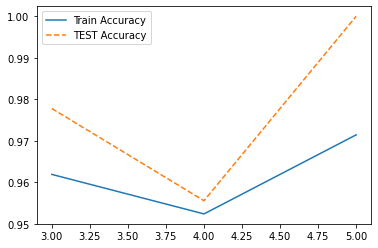

In [11]:
plt.plot(para_n_neighbors,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_neighbors,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [12]:
df_accuracy_neibors.round(3)

,Neibors,Train Accuracy,Test Accuracy
0,3,0.962,0.978
1,4,0.952,0.956
2,5,0.971,1.000


## (7) weights 파라미터 수정

In [14]:
train_accuracy=[];test_accuracy=[];
para_n_neighbors =[i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors,v_weight)in zip (para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weight)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
df_accuracy_weight= pd.DataFrame()
df_accuracy_weight["Weights"]=para_weights
df_accuracy_weight["Neighbors"]=para_n_neighbors
df_accuracy_weight["TrainAccuracy"]=train_accuracy
df_accuracy_weight["TestAccuracy"]=test_accuracy
df_accuracy_weight.round(3)

,Weights,Neighbors,TrainAccuracy,TestAccuracy
0,uniform,1,1.000,0.877
1,uniform,2,0.928,0.912
2,uniform,3,0.929,0.913
3,uniform,4,0.916,0.914
4,uniform,5,0.916,0.908
5,uniform,6,0.913,0.911
6,uniform,7,0.913,0.912
7,uniform,8,0.910,0.912
8,uniform,9,0.911,0.913
9,uniform,10,0.909,0.910


In [16]:
df_accuracy_weight_pivot=df_accuracy_weight.pivot(index="Neighbors",columns="Weights",values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weight_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.877333  0.877333
2                   1.0  0.928326     0.877333  0.912000
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556
6                   1.0  0.913458     0.912889  0.911111
7                   1.0  0.913458     0.912889  0.912000
8                   1.0  0.910027     0.913778  0.912000
9                   1.0  0.910789     0.914667  0.912889
10                  1.0  0.908883     0.914667  0.910222

In [17]:
level0=df_accuracy_weight_pivot.columns.get_level_values(0)
level1=df_accuracy_weight_pivot.columns.get_level_values(1)
df_accuracy_weight_pivot.columns=level0+"_"+level1
df_accuracy_weight_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


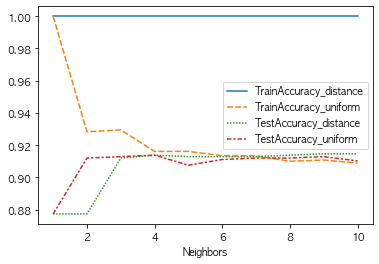

In [19]:
sns.lineplot(data=df_accuracy_weight_pivot)
weights="uniform"

## (8) metric 파라미터 수정

In [24]:
train_accuracy=[];test_accuracy=[];
para_n_neighbors =[i for i in range(1,11)]*3
para_metric=["minkowski"]*10+["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors,v_metric)in zip (para_n_neighbors,para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,metric=v_metric,weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]=train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


In [26]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors",columns="Metric",values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy                     TestAccuracy                    
Metric        euclidean manhattan minkowski    euclidean manhattan minkowski
Neighbors                                                                   
1              1.000000  1.000000  1.000000     0.877333  0.877333  0.877333
2              0.928326  0.926420  0.928326     0.912000  0.913778  0.912000
3              0.929470  0.929470  0.929470     0.912889  0.912000  0.912889
4              0.916127  0.917652  0.916127     0.913778  0.912000  0.913778
5              0.916127  0.915745  0.916127     0.907556  0.907556  0.907556
6              0.913458  0.913458  0.913458     0.911111  0.912000  0.911111
7              0.913458  0.913458  0.913458     0.912000  0.906667  0.912000
8              0.910027  0.910789  0.910027     0.912000  0.912000  0.912000
9              0.910789  0.910789  0.910789     0.912889  0.911111  0.912889
10             0.908883  0.910027  0.908883     0.910222  0.909333  0.910222

In [27]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.877333,0.877333,0.877333
2,0.928326,0.926420,0.928326,0.912000,0.913778,0.912000
3,0.929470,0.929470,0.929470,0.912889,0.912000,0.912889
4,0.916127,0.917652,0.916127,0.913778,0.912000,0.913778
5,0.916127,0.915745,0.916127,0.907556,0.907556,0.907556


## (9) 최종모델

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="euclidean")
knn_model.fit(df_train_x,df_train_y)

y_pred=knn_model.predict(df_test_x)
print("train set :{:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("test set : {:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train set :0.916
test set : 0.914
Confusion matrix:
[[1018    3]
 [  94   10]]
